In [ ]:
import mps
reload(mps)
M1 = mps.MPS({"rand_seed": 1})
M1.rand_init()
print("N = {0:d} sites and chi = {1:d} bond dimension".format(M1.N, M1.chi))
M1.check_canonicalization()

In [ ]:
M2 = mps.MPS({"rand_seed": 2})
M2.rand_init()

This has initialized a random MPS

In [ ]:
M1.left_canonicalize()
M1.check_canonicalization()
M2.right_canonicalize()
M2.check_canonicalization()

In [ ]:
for c1 in np.arange(M1.N):
    print("{0:d}: {1:s}".format(c1, M1.M[c1].shape))

In [ ]:
M2.inner_product(M1)

In [ ]:
M1.left_canonicalize(13)
M1.check_canonicalization()

In [ ]:
M2.get_EE()

In [ ]:
import mpo
reload(mpo)

In [ ]:
W1 = mpo.MPO()


In [ ]:
W1.make_MPO()

In [ ]:
M1.expectation_val(W1)

In [ ]:
#Mact = W1.act_on_MPS(M1)
GSW.inner_product(W1.act_on_MPS(GSW))

In [ ]:
a, b = W1.get_GS()

In [ ]:
run technique.py

In [ ]:
GSE

TEST GROUND STATE DMRG FOR THE HEISENBERG SPIN CHAIN

In [1]:
import mpo, mps
L_arr = np.array([16,24,32,48,64])
chi_arr = np.array([5,10,15,20])
EEs = np.zeros((len(L_arr), len(chi_arr)))
GSEs = []
for cL, L in enumerate(L_arr):
    GSEs.append([])
    W1 = mpo.MPO({'N': L})
    W1.make_MPO()
    for cc, chi in enumerate(chi_arr):
        GSW, GSE = W1.get_GS(params={'chi': chi})
        EEs[cL, cc] = GSW.get_EE()
        GSEs[cL].append(GSE)
        print("L = {0:d} and chi = {1:d}".format(L, chi))

L = 16 and chi = 5
L = 16 and chi = 10
L = 16 and chi = 15
L = 16 and chi = 20
L = 24 and chi = 5
L = 24 and chi = 10
L = 24 and chi = 15
L = 24 and chi = 20
L = 32 and chi = 5
L = 32 and chi = 10
L = 32 and chi = 15
L = 32 and chi = 20
L = 48 and chi = 5
L = 48 and chi = 10
L = 48 and chi = 15
L = 48 and chi = 20
L = 64 and chi = 5
L = 64 and chi = 10
L = 64 and chi = 15
L = 64 and chi = 20


In [5]:
for c1 in np.arange(len(L_arr)):
    for c2 in np.arange(len(chi_arr)):
        print("L = {0:d}, chi = {1:02d}, E = {2:.6f}".format(L_arr[c1], chi_arr[c2], GSEs[c1][c2][-1]))

L = 16, chi = 05, E = -6.897747
L = 16, chi = 10, E = -6.911659
L = 16, chi = 15, E = -6.911728
L = 16, chi = 20, E = -6.911737
L = 24, chi = 05, E = -10.425343
L = 24, chi = 10, E = -10.453401
L = 24, chi = 15, E = -10.453732
L = 24, chi = 20, E = -10.453784
L = 32, chi = 05, E = -13.955820
L = 32, chi = 10, E = -13.996350
L = 32, chi = 15, E = -13.997153
L = 32, chi = 20, E = -13.997308
L = 48, chi = 05, E = -21.024129
L = 48, chi = 10, E = -21.083158
L = 48, chi = 15, E = -21.085353
L = 48, chi = 20, E = -21.085911
L = 64, chi = 05, E = -28.096049
L = 64, chi = 10, E = -28.170231
L = 64, chi = 15, E = -28.174120
L = 64, chi = 20, E = -28.175293


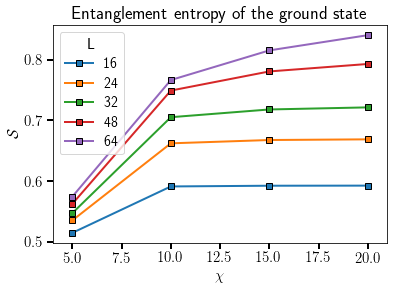

In [15]:
for c in np.arange(len(L_arr)):
    plt.plot(chi_arr, EEs[c,:], '-s', markeredgecolor='k', label='{0:d}'.format(L_arr[c]))
#plt.plot(chi_arr, np.log(chi_arr), '--k')
plt.xlabel('$\chi$')
plt.ylabel('$\mathcal{S}$')
plt.legend(loc='best', title='L')
plt.xlim(4,21)
plt.title('Entanglement entropy of the ground state')

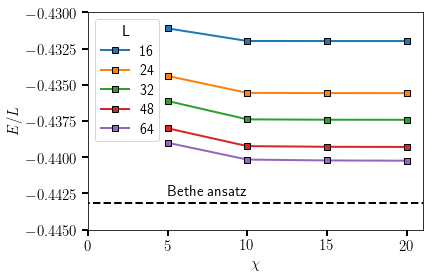

In [23]:
for c1 in np.arange(len(L_arr)):
    G = []
    for c2 in np.arange(len(chi_arr)):
        G.append(GSEs[c1][c2][-1])
    plt.plot(chi_arr, np.array(G)/L_arr[c1], '-s', markeredgecolor='k', label='{0:d}'.format(L_arr[c1]))
Bethe_ansatz = -np.log(2)+0.25
plt.plot([-3,22], np.ones(2)*Bethe_ansatz, '--k')
plt.text(5, -0.4426, 'Bethe ansatz')
plt.xlabel('$\chi$')
plt.ylabel('$E/L$')
plt.xlim(0,21)
plt.ylim(-0.445, -0.43)
plt.legend(loc='best', title='L')

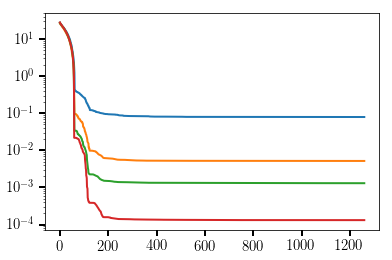

In [30]:
p = -28.1754248597421
plt.plot(np.array(GSEs[4][0])-p)
plt.plot(np.array(GSEs[4][1])-p)
plt.plot(np.array(GSEs[4][2])-p)
plt.plot(np.array(GSEs[4][3])-p)
plt.yscale('log')

In [35]:
print("{0:.12f}\n{1:.12f}\n{2:.12f}".format(GSEs[4][3][259],GSEs[4][3][659],GSEs[4][3][1259]))

-28.175283597531
-28.175292068916
-28.175292928781
